#Baseline Models and Voting

In [ ]:
# example of a voting ensemble with soft voting of ensemble members
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('tree', DecisionTreeClassifier()))
	models.append(('nb', GaussianNB()))
	models.append(('svm', SVC(probability=True)))
	return models

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft')
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the ensemble
scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize the result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.928 (0.013)


>lr 0.856 (0.014)
>knn 0.953 (0.008)
>tree 0.866 (0.015)
>nb 0.847 (0.021)
>svm 0.953 (0.010)


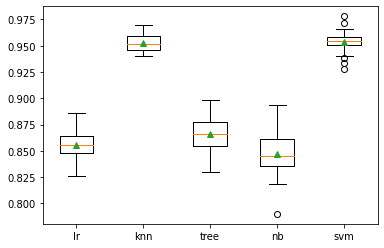

In [ ]:
# evaluate standard models on the synthetic dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('tree', DecisionTreeClassifier()))
	models.append(('nb', GaussianNB()))
	models.append(('svm', SVC(probability=True)))
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models:
	# evaluate model
	scores = evaluate_model(model, X, y)
	# store results
	results.append(scores)
	names.append(name)
	# summarize result
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#Ensemble Pruning Example

In [ ]:
# example of ensemble pruning for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('tree', DecisionTreeClassifier()))
	models.append(('nb', GaussianNB()))
	models.append(('svm', SVC(probability=True)))
	return models

# evaluate a list of models
def evaluate_ensemble(models, X, y):
	# check for no models
	if len(models) == 0:
		return 0.0
	# create the ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the ensemble
	scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return mean score
	return mean(scores)

# perform a single round of pruning the ensemble
def prune_round(models_in, X, y):
	# establish a baseline
	baseline = evaluate_ensemble(models_in, X, y)
	best_score, removed = baseline, None
	# enumerate removing each candidate and see if we can improve performance
	for m in models_in:
		# copy the list of chosen models
		dup = models_in.copy()
		# remove this model
		dup.remove(m)
		# evaluate new ensemble
		result = evaluate_ensemble(dup, X, y)
		# check for new best
		if result > best_score:
			# store the new best
			best_score, removed = result, m
	return best_score, removed

# prune an ensemble from scratch
def prune_ensemble(models, X, y):
	best_score = 0.0
	# prune ensemble until no further improvement
	while True:
		# remove one model to the ensemble
		score, removed = prune_round(models, X, y)
		# check for no improvement
		if removed is None:
			print('>no further improvement')
			break
		# keep track of best score
		best_score = score
		# remove model from the list
		models.remove(removed)
		# report results along the way
		print('>%.3f (removed: %s)' % (score, removed[0]))
	return best_score, models

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# prune the ensemble
score, model_list = prune_ensemble(models, X, y)
names = ','.join([n for n,_ in model_list])
print('Models: %s' % names)
print('Final Mean Accuracy: %.3f' % score)

#Ensemble Growing Example

In [ ]:
# example of ensemble growing for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(('lr', LogisticRegression()))
	models.append(('knn', KNeighborsClassifier()))
	models.append(('tree', DecisionTreeClassifier()))
	models.append(('nb', GaussianNB()))
	models.append(('svm', SVC(probability=True)))
	return models

# evaluate a list of models
def evaluate_ensemble(models, X, y):
	# check for no models
	if len(models) == 0:
		return 0.0
	# create the ensemble
	ensemble = VotingClassifier(estimators=models, voting='soft')
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the ensemble
	scores = cross_val_score(ensemble, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return mean score
	return mean(scores)

# perform a single round of growing the ensemble
def grow_round(models_in, models_candidate, X, y):
	# establish a baseline
	baseline = evaluate_ensemble(models_in, X, y)
	best_score, addition = baseline, None
	# enumerate adding each candidate and see if we can improve performance
	for m in models_candidate:
		# copy the list of chosen models
		dup = models_in.copy()
		# add the candidate
		dup.append(m)
		# evaluate new ensemble
		result = evaluate_ensemble(dup, X, y)
		# check for new best
		if result > best_score:
			# store the new best
			best_score, addition = result, m
	return best_score, addition

# grow an ensemble from scratch
def grow_ensemble(models, X, y):
	best_score, best_list = 0.0, list()
	# grow ensemble until no further improvement
	while True:
		# add one model to the ensemble
		score, addition = grow_round(best_list, models, X, y)
		# check for no improvement
		if addition is None:
			print('>no further improvement')
			break
		# keep track of best score
		best_score = score
		# remove new model from the list of candidates
		models.remove(addition)
		# add new model to the list of models in the ensemble
		best_list.append(addition)
		# report results along the way
		names = ','.join([n for n,_ in best_list])
		print('>%.3f (%s)' % (score, names))
	return best_score, best_list

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# grow the ensemble
score, model_list = grow_ensemble(models, X, y)
names = ','.join([n for n,_ in model_list])
print('Models: %s' % names)
print('Final Mean Accuracy: %.3f' % score)